In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/2000-2021 SINGLE TURKEY FIRE_M-C61_214067.csv', dtype={'version': str})
df.head()
df.info()


df = df.dropna()


df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211309 entries, 0 to 211308
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    211309 non-null  float64
 1   longitude   211309 non-null  float64
 2   brightness  211309 non-null  float64
 3   scan        211309 non-null  float64
 4   track       211309 non-null  float64
 5   acq_date    211309 non-null  object 
 6   acq_time    211309 non-null  int64  
 7   satellite   211309 non-null  object 
 8   instrument  211309 non-null  object 
 9   confidence  211309 non-null  int64  
 10  version     211309 non-null  object 
 11  bright_t31  211309 non-null  float64
 12  frp         211309 non-null  float64
 13  daynight    211309 non-null  object 
 14  type        205918 non-null  float64
dtypes: float64(8), int64(2), object(5)
memory usage: 24.2+ MB


Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = df[~((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)]

print(f"Original data shape: {df.shape}")
print(f"Filtered data shape: {df_filtered.shape}")

df = df_filtered.copy()



Original data shape: (205918, 15)
Filtered data shape: (133412, 15)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
# Assuming 'brightness' is the target variable and the rest of the numerical columns are features
features = df.select_dtypes(include=np.number).drop('brightness', axis=1).columns.tolist()
target = 'brightness'

X = df[features]
y = df[target]

display(X.head())
display(y.head())

,latitude,longitude,scan,track,acq_time,confidence,bright_t31,frp,type
0,36.8527,35.3594,2.1,1.4,815,60,294.4,13.2,0.0
1,40.5441,35.1786,1.1,1.0,857,66,296.0,5.8,0.0
2,40.1473,35.0444,1.1,1.0,857,46,293.5,4.3,0.0
3,40.5421,35.1909,1.1,1.0,857,69,296.1,7.3,0.0
6,39.1096,33.9391,1.0,1.0,858,82,294.4,20.2,0.0


,brightness
0,306.0
1,307.8
2,305.3
3,310.0
6,324.5


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape (X_train): {X_train.shape}")
print(f"Testing data shape (X_test): {X_test.shape}")
print(f"Training data shape (y_train): {y_train.shape}")
print(f"Testing data shape (y_test): {y_test.shape}")

Training data shape (X_train): (106729, 9)
Testing data shape (X_test): (26683, 9)
Training data shape (y_train): (106729,)
Testing data shape (y_test): (26683,)


In [ ]:
# Build the linear regression model
model = LinearRegression()

In [ ]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 8.39
R-squared: 0.94


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate a RandomForestRegressor object
model = RandomForestRegressor(random_state=42)

In [ ]:
# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 2.78
R-squared: 0.98


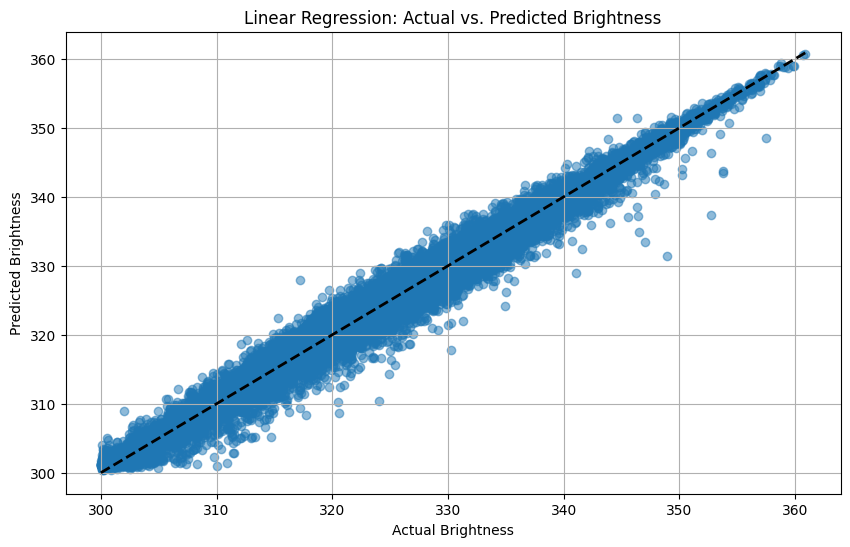

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Brightness")
plt.ylabel("Predicted Brightness")
plt.title("Linear Regression: Actual vs. Predicted Brightness")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Add a diagonal line for perfect prediction
plt.grid(True)
plt.show()

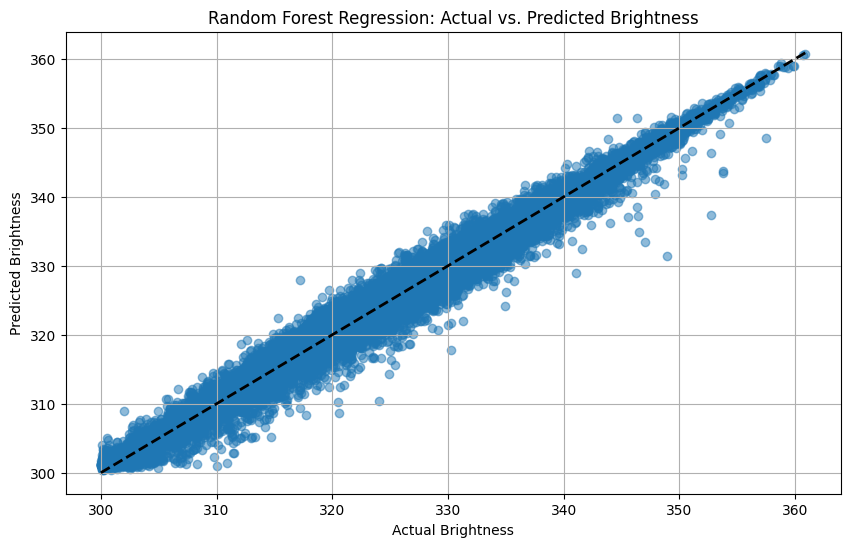

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred from the Random Forest model are available
# If you have overwritten y_pred with the linear regression predictions, you'll need to re-run the prediction cell for the Random Forest model.

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Brightness")
plt.ylabel("Predicted Brightness")
plt.title("Random Forest Regression: Actual vs. Predicted Brightness")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Add a diagonal line for perfect prediction
plt.grid(True)
plt.show()

In [ ]:
import statsmodels.api as sm

# Linear Regression Model Summary
X_train_sm = sm.add_constant(X_train) # Add a constant for the intercept
lr_sm = sm.OLS(y_train, X_train_sm).fit()
print("Linear Regression Model Summary:")
print(lr_sm.summary())

# For Random Forest, there isn't a standard summary table like OLS.
# We can print feature importances again as a form of summary.
print("\nRandom Forest Feature Importances (as a summary):")
importances = model.feature_importances_
features = X.columns

for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.4f}")

Linear Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:             brightness   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 2.118e+05
Date:                Thu, 17 Jul 2025   Prob (F-statistic):               0.00
Time:                        15:30:26   Log-Likelihood:            -2.6471e+05
No. Observations:              106729   AIC:                         5.294e+05
Df Residuals:                  106720   BIC:                         5.295e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        109.99

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


latitude: 0.0066
longitude: 0.0046
scan: 0.0126
track: 0.0038
acq_time: 0.0031
confidence: 0.2732
bright_t31: 0.6542
frp: 0.0420
type: 0.0000


In [ ]:
from pyspark.sql import SparkSession

# Create Spark session
spark = SparkSession.builder \
    .appName("TurkeyFireAnalysis") \
    .getOrCreate()

spark_df= spark.createDataFrame(df)
spark_df.show()

+--------+---------+----------+----+-----+----------+--------+---------+----------+----------+-------+----------+----+--------+----+
|latitude|longitude|brightness|scan|track|  acq_date|acq_time|satellite|instrument|confidence|version|bright_t31| frp|daynight|type|
+--------+---------+----------+----+-----+----------+--------+---------+----------+----------+-------+----------+----+--------+----+
| 36.8527|  35.3594|     306.0| 2.1|  1.4|2000-11-01|     815|    Terra|     MODIS|        60|   6.03|     294.4|13.2|       D| 0.0|
| 40.5441|  35.1786|     307.8| 1.1|  1.0|2000-11-02|     857|    Terra|     MODIS|        66|   6.03|     296.0| 5.8|       D| 0.0|
| 40.1473|  35.0444|     305.3| 1.1|  1.0|2000-11-02|     857|    Terra|     MODIS|        46|   6.03|     293.5| 4.3|       D| 0.0|
| 40.5421|  35.1909|     310.0| 1.1|  1.0|2000-11-02|     857|    Terra|     MODIS|        69|   6.03|     296.1| 7.3|       D| 0.0|
| 39.1096|  33.9391|     324.5| 1.0|  1.0|2000-11-02|     858|    Ter

In [ ]:
from pyspark.sql.functions import sum, year

# Extract the year from 'acq_date' and create a new 'Year' column
spark_df_with_year = spark_df.withColumn("Year", year("acq_date"))

# Group by 'Year' and calculate the sum of 'brightness' for each year
final_result = spark_df_with_year.groupBy("Year").agg(sum("brightness").alias("total_brightness_by_year"))

# Show the result
final_result.orderBy("Year").show()

+----+------------------------+
|Year|total_brightness_by_year|
+----+------------------------+
|2000|      144385.09999999995|
|2001|       1076852.200000003|
|2002|       1468170.900000001|
|2003|      1602603.1999999997|
|2004|      1815037.6000000031|
|2005|       1791790.000000001|
|2006|      1912221.1000000015|
|2007|       1770349.800000001|
|2008|       1240878.200000004|
|2009|      3881693.4999999977|
|2010|       2773047.800000015|
|2011|       3911255.799999999|
|2012|      1499348.8000000012|
|2013|        2445505.60000001|
|2014|      1418871.4999999988|
|2015|               3668936.3|
|2016|      2947289.4000000004|
|2017|      1945874.3000000073|
|2018|      1758386.6999999958|
|2019|      1980234.5999999929|
+----+------------------------+
only showing top 20 rows



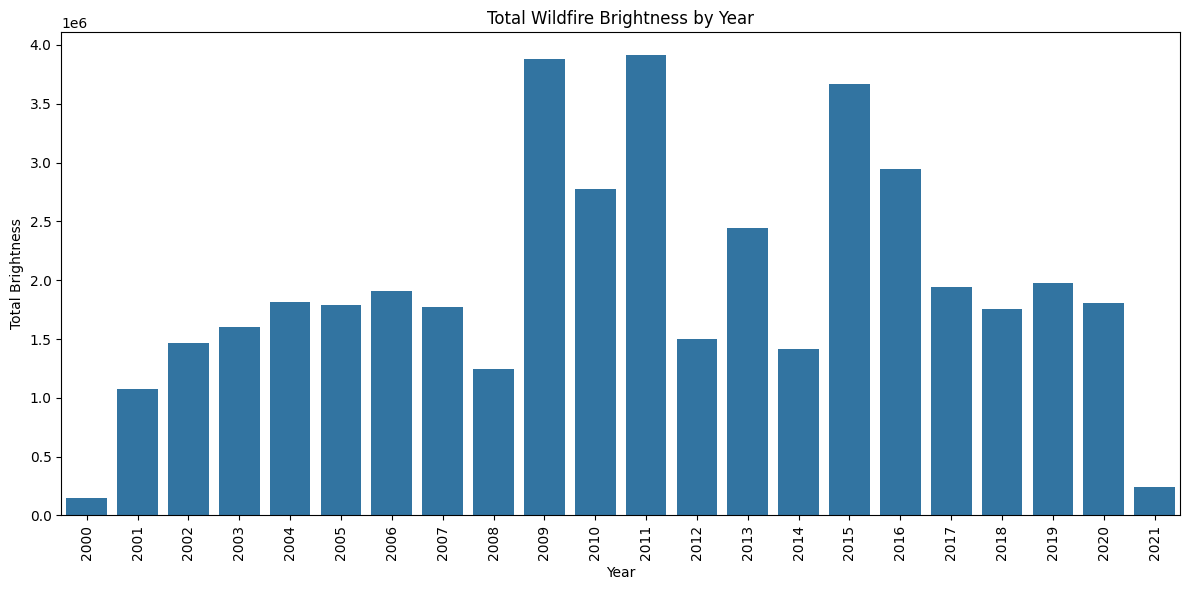

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the PySpark DataFrame to a Pandas DataFrame for plotting
pandas_result = final_result.toPandas()

# Create a bar plot of total brightness by year
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='total_brightness_by_year', data=pandas_result)
plt.xlabel('Year')
plt.ylabel('Total Brightness')
plt.title('Total Wildfire Brightness by Year')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [ ]:
import time
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Measure training time for Linear Regression
start_time_lr = time.time()
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
end_time_lr = time.time()
training_time_lr = end_time_lr - start_time_lr
print(f"Linear Regression Training Time: {training_time_lr:.4f} seconds")

# Measure training time for Random Forest Regression
start_time_rf = time.time()
# The model variable was already updated to RandomForestRegressor in a previous cell
model.fit(X_train, y_train)
end_time_rf = time.time()
training_time_rf = end_time_rf - start_time_rf
print(f"Random Forest Regression Training Time: {training_time_rf:.4f} seconds")

Linear Regression Training Time: 0.0602 seconds
Random Forest Regression Training Time: 95.5799 seconds


In [ ]:
# Retrieve the MSE and R-squared for Linear Regression from the previous output
# Based on the output of cell n8LLeyiGAWI1, the Linear Regression metrics were:
lr_mse = 8.39
lr_r2 = 0.94

# The current values of mse and r2 variables are for Random Forest
rf_mse = mse
rf_r2 = r2

# Create a dictionary to store the metrics
performance_data = {
    'Metric': ['Training Time (s)', 'MSE', 'R-squared'],
    'Linear Regression': [training_time_lr, lr_mse, lr_r2],
    'Random Forest': [training_time_rf, rf_mse, rf_r2]
}

# Create a pandas DataFrame
performance_df = pd.DataFrame(performance_data)

# Display the DataFrame
display(performance_df)

,Metric,Linear Regression,Random Forest
0,Training Time (s),0.060186,95.579871
1,MSE,8.390000,2.780013
2,R-squared,0.940000,0.980395


In [ ]:
display(performance_df)

,Metric,Linear Regression,Random Forest
0,Training Time (s),0.060186,95.579871
1,MSE,8.390000,2.780013
2,R-squared,0.940000,0.980395
